In [3]:
from czifile import CziFile, czi2tif

In [3]:
with CziFile('2019_04_24__0010.czi') as czi:
    image_arrays = czi.asarray()

In [4]:
image_arrays.shape

(1, 1, 1, 90864, 96361, 3)

In [4]:
tif = czi2tif(czifile='2019_04_24__0011.czi')


Opening CZI file... 0.852 s
Image
  axes:  YX0
  shape: (95083, 100649, 3)
  dtype: uint8
  size:  26.74 GiB
Creating empty TIF file... 0.008 s
Copying image from CZI to TIF file... 5.546 s


In [14]:
from PIL import Image

# im = Image.open('2019_04_24__0010.czi.tif')

In [1]:
from osgeo import gdal, ogr

In [4]:
src_ds = gdal.Open("CZI/sample_04.tiff")

# tif = imread('CZI/slide.tiff')
# a = Image.fromarray(im, 'RGB')

In [8]:
a = src_ds.ReadAsArray()

In [29]:
import numpy as np

s_image = np.dstack((a[0], a[1], a[2]))

In [20]:
import cv2

In [30]:
s_image = cv2.cvtColor(s_image, cv2.COLOR_RGBA2RGB) # 색깔 자체가 바뀌어버림.

In [42]:
s_image.shape

(10154, 8000, 3)

In [ ]:
cv2.imshow('svs', s_image)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

f = np.rollaxis(a, 0, 3)

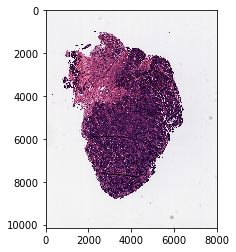

In [41]:
plt.imshow(s_image)
plt.show()

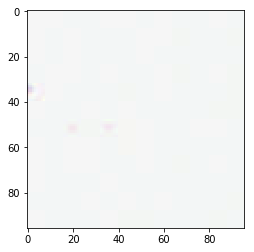

In [41]:
(img_h, img_w, img_ch) = f.shape

# Crop size
grid_w = 96
grid_h = 96

range_w = (int)(img_w / grid_w)
range_h = (int)(img_h / grid_h)

im = f[0:0 + 96, 0:0 + 96 , :]

# height width : grid
# x y : range
# image[y0:y0+height , x0:x0+width, :]

plt.imshow(im)
plt.show()

In [16]:
import tensorflow as tf
import math

In [54]:
# 이미지 자르기
def image_crop(imarr, save_path):
    (img_h, img_w, img_ch) = imarr.shape
    
    # Crop size
    grid_w = 1024
    grid_h = 1024

    range_w = (int(math.ceil(img_w / (grid_w * 1.0))))
    range_h = (int(math.ceil(img_h / (grid_h * 1.0))))

    i = 0
    
    for w in range(range_w):
        for h in range(range_h):
            # y_start, x_start, y_end, x_end
            # bbox = [h * grid_h, w * grid_w, (h + 1) * (grid_h), (w + 1) * (grid_w)]
            fname = "{}.jpg".format("{0:05d}".format(i))
            savename = save_path + fname
            cr = imarr[grid_w * w:min(grid_w * w + 1024, img_h), grid_h * h:min(grid_h * h + 1024, img_w)]
            
            try:
                cr2 = cv2.cvtColor(cr, cv2.COLOR_RGB2BGR)
                cv2.imwrite(savename, cr2)
            except:
                cv2.imwrite(savename, cr)
            
            i += 1

In [55]:
image_crop(s_image, 'CZI/CROP/')

In [ ]:
img = cv2.imread('CZI/2019_04_24__0010.czi.tif', 1)

In [11]:
im_A = im[30000:54100, 30000:54100, :]

In [24]:
im.shape

(95083, 100649, 3)

In [28]:
import matplotlib.pyplot as plt

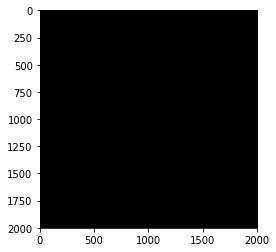

In [54]:
plt.imshow(im_A)
plt.show()